(intro-to-odes-euler-method)=
# 8.3. Introduction to Numerically solving Ordinary Differential Equations - Euler Method

In this notebook we will look at how we can solve ODEs numerically, starting simple with the Euler method. To do this we will have an ODE and an initial value where our numerical solver starts and then march forward in time to find the particular solution. This is also known as **Initial Value Problem (IVP)**.

When we look at the general form of a first-order ordinary differential equation (ODE) together with an initial condition, we have the following first order initial value problem (IVP):

$$ \dot{x}(t)=f(t,x(t)), \hspace{1cm} a \leq t \leq b $$

$$ x(a)=x_0 $$

Here $t$ is called the independant variable and $x$ is called the dependant variable. The initial condition $x(a)=x_0$ is the value of $x$ at the starting point $t=a$. The solution to an IVP is a function that satisfies the ODE and the initial condition. We can solve an ODE numerically if use the initial condition as a starting point and then march forward in time to find the particular solution.

We will look how we can solve it numerically and approximate the solution at discrete points in time using the Euler method. First let's think about how we could solve such an equation. We could integrate the equation from $t_0$ to $t_1$ to get a solution for $x(t_1)$. So let's look at how we can integrate an equation.

## Numerical integration: Trapezoidal rule

When we integrate the equationfrom above, we get:

$$ 
x(b) = \int_{a}^{b} f(x(t),t) dt, \hspace{0.2cm} x(a) = x_0
$$

where $a$ and $b$ are the start and end points of the integration.

You probably remember that you can solve a definite integrals ($ \int_a^b f(x) dx $) intgral using the **trapezoidal rule**, which finds the area under the curve by creating trapezoids and summing their areas:

$$ 
\text{area under curve} = \sum \left( \frac{f(x_{i+1}) + f(x_i)}{2} \right) \Delta x
$$ 

where $\Delta x$ is the width of the trapezoid.

## Numrically Solving ODEs using Euler's Method

When we need to solve ODEs of the form

$$
\dot{x}=f(x,t), \hspace{1cm} x(t_0)=x_0
$$

we need other methods to integrate the equation. All of them will work by starting at the initial conditions, and then using information provided by the ODE to march forward in the solution, based on an increment (i.e., step size) $\Delta x$.  

Let's look at a simple example first:

$$
\frac{dx}{dt} = 4 t - \frac{2 x}{t} , \hspace{1cm} \quad x(1) = 1
$$

For this problem we can find the general and particular solutions to compare our numerical results against:

$$
\begin{align}
\text{general: } x(t) &= t^2 + \frac{c}{t^2} \\
\text{particular: } x(t) &= t^2
\end{align}
$$

**Forward Euler Method:** Recall that the derivative, $\dot{x}$, is the same as the slope or the tangent line to the curve $x(t)$. So, if we know the value of $x$ at a point, we can approximate the value of $x$ at a later point by drawing a line with slope $\dot{x}$ and using the equation for a line to find the value of $x$ at the later point. At the starting point, $(x,t) = (1,1)$, where $\dot{x} = 2$, this looks like:

In [1]:
import Pkg
Pkg.instantiate()

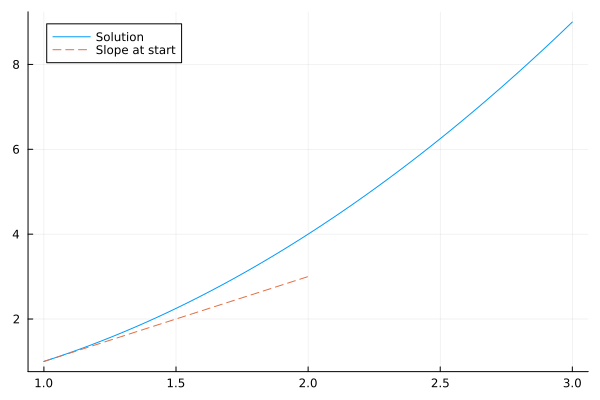

In [8]:
using Plots

t_vals = range(1, 3, length=50)
x_vals = t_vals.^2

plot(t_vals, x_vals, label="Solution")
plot!([1, 2], [1, 3], linestyle=:dash, label="Slope at start")

We want to solve the following integral: 

$$ 
x(b) = \int_{a}^{b} f(x(t),t) dt , \hspace{1cm} x(t_0) = x_0.
$$

Let's consider the initial condition — the starting point — as $(t_i, x_i)$, and the next point in our numerical solution is $(t_{i+1}, x_{i+1})$, where $i$ represents an index over the interval $[1,N]$. Our step size is then $\Delta t = t_{i+1} - t_i$.

Based on our (simple) approximation to the first derivative based on slope, we can relate the derivative to our two points:

$$
\left(\frac{dx}{dt}\right)_{i} = \frac{x_{i+1} - x_i}{t_{i+1} - t_i} = \frac{x_{i+1} - x_i}{\Delta t}
$$

Then, solve this for our unknown:

$$
x_{i+1} = x_i + \left(\frac{dx}{dt}\right)_i \Delta t
$$

This is the **Forward Euler method**. 

We can also rewrite this if we assume that $x$ is a function of $t$ and $f(x,t)$ is defined as the derivative of $x$ with respect to $t$:

$$
x(t_{i+1}) = x(t_i) + f(x(t_i),t_i) \Delta t
$$
    
where $\Delta t$ is the step size and $f(x(t_n),t_n)$ is the derivative of $x$ at $t_n$. 

We can use this to solve our equation numerically using a given step size $\Delta x$ and march forward for a given number of steps $N$. For our example this will look something like this:

In [9]:
t_exact = range(1, 3, length=50)
x_exact = t_exact .^ 2

# our derivative function, dy/dx
function dxdt(t, x)
    return 4 * t - (2 * x) / t
end

dt = 0.1
t_vals = 1:dt:3
x_vals = zeros(length(t_vals))

# set initial condition
x_vals[1] = 1

1

### Task: Implement the Loop for the Forward Euler Method

In [10]:
# iterate over t_vals, calculating x_vals
for idx in 1:length(t_vals)-1
    x_vals[idx+1] = x_vals[idx] + dxdt(t_vals[idx], x_vals[idx]) * dt
end

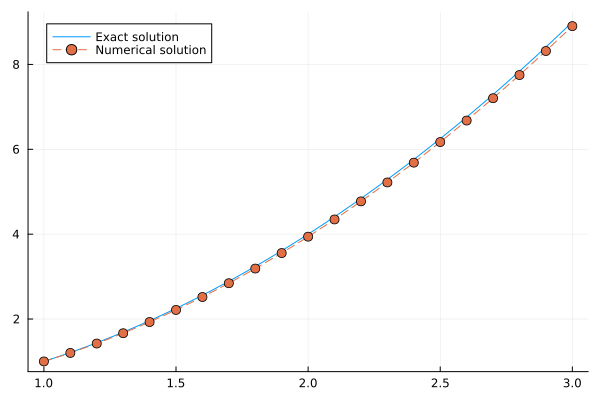

In [38]:
plot(t_exact, x_exact, label="Exact solution")
plot!(t_vals, x_vals, marker=:circle, markersize=5, linestyle=:dash, label="Numerical solution")

### Combining the foward Euler method with direction fields
Let's add the direction field for our ODE and the solution curve for our particular solution to our plot:

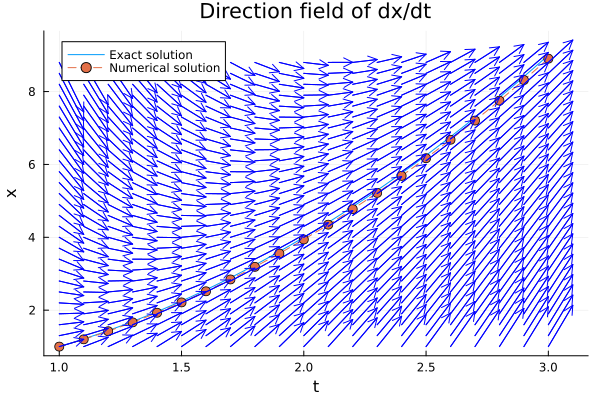

In [39]:
t = range(1, 3, step=0.1)
x = range(1, 9, step=0.3)

# rectangular grid with points
T = repeat(t', length(x), 1)
X = repeat(x, 1, length(t))

# Define the differential equation dx/dt 
dx = dxdt.(T, X)
dt = ones(size(dx))

# Plot the direction field
quiver!(T, X, quiver=(dt ./ 10, dx ./ 10), color=:blue, xlabel="t", ylabel="x", title="Direction field of dx/dt")

We can see that the Solution derived by the Euler method is like starting at a specific point and then stepping in the direction of the slope vectors from the direction field to approximate the solution curve. By Following the arrows we can interpet different solutions for different initial conditions. This makes direction fields a very useful tool to understand the behaviour of a system of ODEs.

### Final Remarks on the Forward Euler Method

**Note** Another way to obtain the recursion formula for the Forward Euler method is to use a Taylor series expansion. Recall that for well-behaved functions, the Taylor series expansion says

$$
x(t + \Delta t) = x(t) + \Delta t x^{\prime}(t) + \frac{1}{2} \Delta t^2 x^{\prime\prime}(t) + \frac{1}{3!} \Delta t^3 x^{\prime\prime\prime}(t) \dots \;.
$$

When we apply this formula to our (unknown) solution $x_i$ and cut off the terms of order $\Delta t^2$ and higher; the derivative $\dot{x}$ is given by our original ODE. We can see that this gives us the same recursion formula as above. We can also see that we are introducing some error on the order of $\Delta t^2$ at each step. This is the *local truncation error*. The *global error* is the accumulation of error over all the steps, and is on the order of $\Delta t$. Thus, the Forward Euler method is a **first-order** method, because its global error is on the order of the step size to the first power: error $\sim \mathcal{O}(\Delta t)$.

>**Summary** Applying the Forward Euler method requires:
>
>1. Have a given first-order ODE: $\frac{dx}{dt} = \dot{x} = f(t,x)$. Complex and/or nonlinear problems are fine!
>2. Specify the step size $\Delta t$.
>3. Specify the domain over which to integrate: $t_1 \leq t \leq t_n$
>4. Specify the initial condition: $x(t=t_1) = x_1$